In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data taken from the [Tabular Playground Series Kaggle Competition](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview).

In [2]:
train = pd.read_csv("train.csv", index_col = "id")
test = pd.read_csv("test.csv", index_col = "id")

In [3]:
train.describe(include = "all")

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,2,2,2,4,4,4,8,8,7,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A,A,A,C,B,B,A,E,C,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [5]:
print(f"There are {train.isna().sum().sum()} blank cells in the training data")
print(f"There are {test.isna().sum().sum()} blank cells in the testing data")

There are 0 blank cells in the training data
There are 0 blank cells in the testing data


## Modeling

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [7]:
X = train.drop("target", axis = 1)
y = train["target"]

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = .75, test_size = .25, random_state = 42)

In [9]:
categorical_variables = []
numerical_variables = []
for i in X_train:
    if X_train[i].dtype == "O":
        categorical_variables.append(i)
    elif X_train[i].dtype == "float64":
        numerical_variables.append(i)

predictor_variables = categorical_variables + numerical_variables

In [10]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

preprocessor = ColumnTransformer([
        ("numeric", numeric_transformer, numerical_variables),
        ("categorical", categorical_transformer, categorical_variables)
    ])

In [11]:
def test_model_no_params(X_train, y_train, X_test, y_test, model_type):
    """
    This function automates the machine learning process in order to make it easier to run multiple models. It returns the predictions made by the model on the validation set, 
    the mean absolute error, mean squared error, r2 score, and the actual model pipeline. The model pipeline can be used to predict on the hold out testing set for submission.
    """
    model = model_type
    pipeline = Pipeline(steps = [
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return predictions, mae, mse, r2, pipeline

In [12]:
def test_model_with_params(X_train, y_train, X_test, y_test, model_type, params):
    """
    This functions allows for creating models and specifying a parameteter grid in which to test with. The function returns the predictions made, mean absolute error,
    mean squared error, r2 score, and the clf variable with the best model chosen from the specified hyper parameters.
    """
    model = model_type
    pipeline = Pipeline(steps = [
        ("preprocess", preprocessor),
        ("model", model)
    ])
    clf = GridSearchCV(pipeline, param_grid = params, cv = 3, n_jobs = 4)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return predictions, mae, mse, r2, clf

In [13]:
def get_model_results(model_results, model_type):
    """
    This function loops through the model results and creates a dataframe with the name of the model as well as the metrics in order for easy evaluation and to compare 
    models to each other to determine which is best.
    """
    for i in model_results:
        mae = model_results[1]
        mse = model_results[2]
        r2 = model_results[3]
        
        return pd.DataFrame({"model": [model_type], "mae": [mae], "mse": [mse], "r2": [r2]})

### Linear Model

In [14]:
linear_model_results = test_model_no_params(X_train, y_train, X_val, y_val, LinearRegression())

In [15]:
linear_results_df = get_model_results(linear_model_results, "Linear Regression")
linear_results_df

,model,mae,mse,r2
0,Linear Regression,0.719639,0.747482,0.054602


### Random Forest

In [16]:
random_forest_results = test_model_no_params(X_train, y_train, X_val, y_val, RandomForestRegressor())

In [17]:
random_forest_results_df = get_model_results(random_forest_results, "Random Forest")
random_forest_results_df

,model,mae,mse,r2
0,Random Forest,0.71628,0.736518,0.068469


### XGBoost

In [18]:
xgboost_model_results = test_model_no_params(X_train, y_train, X_val, y_val, XGBRegressor())

In [19]:
xgboost_results_df = get_model_results(xgboost_model_results, "XGBoost")
xgboost_results_df

,model,mae,mse,r2
0,XGBoost,0.709442,0.723245,0.085256


### XGBoost Parameter Tuning

In [20]:
xgboost_grid = {
    "model__learning_rate": [0.05, .01, .02],
    "model__max_depth": [4, 6, 8],
    "model__n_estimators": [1000, 2500]
}

In [21]:
xgboost_tuned_results = test_model_with_params(X_train, y_train, X_val, y_val, XGBRegressor(), xgboost_grid)

In [23]:
xgboost_tuned_results_df = get_model_results(xgboost_tuned_results, "Tuned XGBoost")
xgboost_tuned_results_df

,model,mae,mse,r2
0,Tuned XGBoost,0.706424,0.71406,0.096874


## Evaluate Models

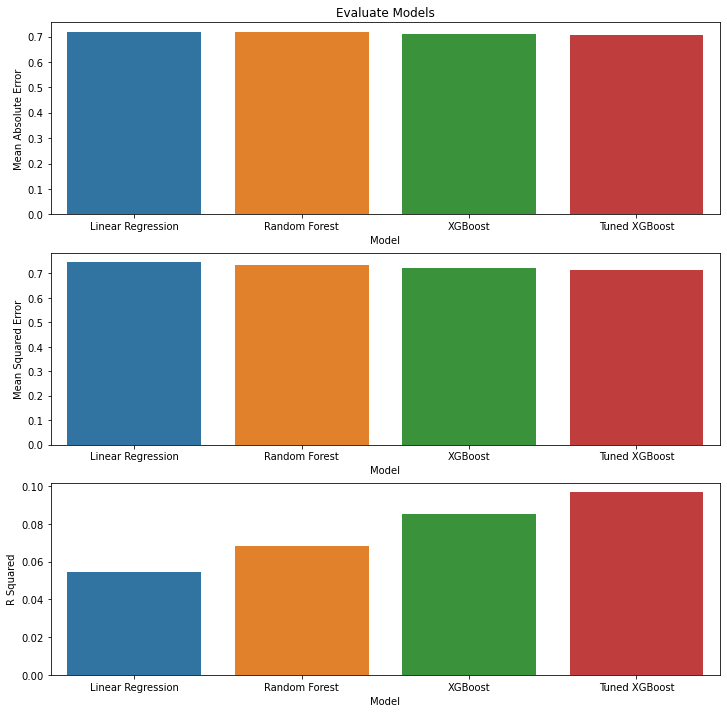

In [45]:
all_models = pd.concat([linear_results_df, random_forest_results_df, xgboost_results_df, xgboost_tuned_results_df])

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (12, 12))

sns.barplot(x = all_models["model"], y = all_models["mae"], ax = ax0)
sns.barplot(x = all_models["model"], y = all_models["mse"], ax = ax1)
sns.barplot(x = all_models["model"], y = all_models["r2"], ax = ax2)

plt.title("Evaluate Models", y = 3.4)

ax0.set_ylabel("Mean Absolute Error")
ax1.set_ylabel("Mean Squared Error")
ax2.set_ylabel("R Squared")

for ax in fig.axes:
    ax.set_xlabel("Model")

The XGBoost model that has tuned parameters performs slightly better than the other 3 models created. However, all models have a relatively low R Squared value.

## Use Best Model On Test data

In [46]:
id = test.index

In [47]:
test_results = xgboost_tuned_results[4].predict(test)

In [48]:
xgboost_submission = pd.DataFrame({"id": id, "target": test_results})

In [49]:
xgboost_submission.to_csv("xgboost_submission.csv")

In [53]:
xgboost_tuned_results[4].cv_results_

{'mean_fit_time': array([145.60654283, 336.16938535, 232.68121227, 508.9394567 ,
        305.78496114, 762.4457469 , 116.15029629, 306.59172622,
        221.18429828, 484.06370155, 296.94013619, 741.63235362,
        108.17240787, 294.04416815, 211.03231645, 485.1113197 ,
        295.85158968, 518.78522023]),
 'std_fit_time': array([ 0.8731166 ,  4.33355552, 10.58837237,  6.23730918, 15.86996661,
        19.05933102,  2.42789062,  6.4033222 ,  5.95201478,  5.23765173,
        18.15327839, 34.71132834,  1.74326579,  4.81902348,  3.80549837,
         5.74609888, 17.62381012, 60.67194667]),
 'mean_score_time': array([0.38403924, 0.56718254, 0.48044483, 0.76297243, 0.55517594,
        0.91916951, 0.39002148, 0.54749799, 0.48077059, 0.71865384,
        0.53215051, 0.94285782, 0.37867769, 0.50312432, 0.45441318,
        0.71231445, 0.54149246, 0.75602086]),
 'std_score_time': array([0.01041746, 0.01679478, 0.01858827, 0.00719044, 0.02137539,
        0.034531  , 0.01585394, 0.00572051, 0.0130

In [54]:
xgboost_tuned_results[4].best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 4,
 'model__n_estimators': 1000}